In [1]:
import sys
sys.path.insert(0, '/home/gus/learn/portfolio/portfolio_beginner_iris/')
from src import visualize as vis
from src import custom_print as cp

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

**(1)** Dataset loading

In [2]:
filename = '../data/raw/iris.data'
names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class']
df = pd.read_csv(filename, header=None, names=names)

In [3]:
df.sample(10, random_state=42)

,sepal_length,sepal_width,petal_length,petal_width,class
73,6.1,2.8,4.7,1.2,Iris-versicolor
18,5.7,3.8,1.7,0.3,Iris-setosa
118,7.7,2.6,6.9,2.3,Iris-virginica
78,6.0,2.9,4.5,1.5,Iris-versicolor
76,6.8,2.8,4.8,1.4,Iris-versicolor
31,5.4,3.4,1.5,0.4,Iris-setosa
64,5.6,2.9,3.6,1.3,Iris-versicolor
141,6.9,3.1,5.1,2.3,Iris-virginica
68,6.2,2.2,4.5,1.5,Iris-versicolor
82,5.8,2.7,3.9,1.2,Iris-versicolor


**(2)** General characterization of the dataset

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


- consistent unit system (cgs) → no transformation needded
- same order of magnitude → no standarization needed
- similar distributions → no normalization needed

In [6]:
df.groupby('class').size()

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

**(3)** Visualization

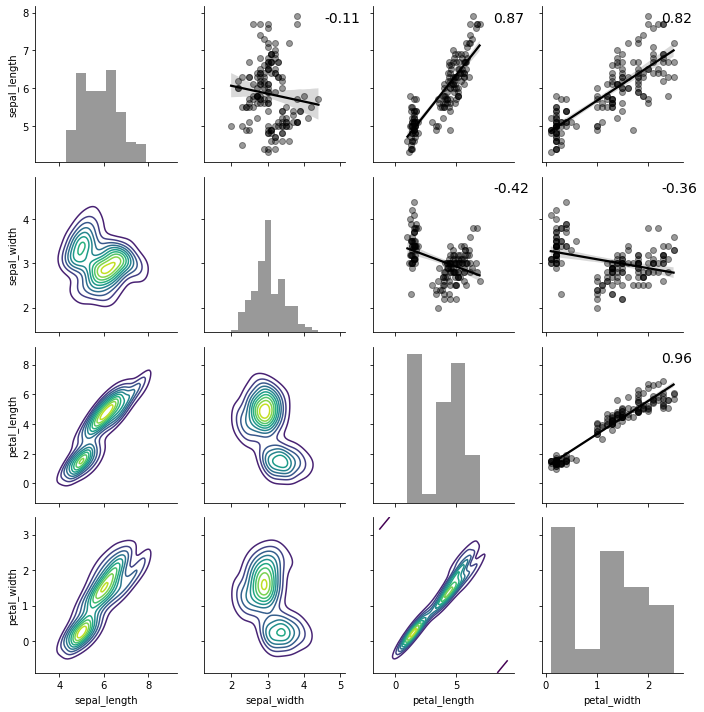

In [7]:
vis.plot_scatter_grid(df, alpha=0.4)

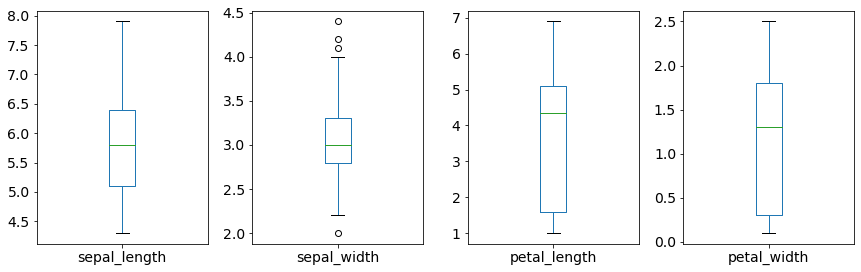

In [8]:
plt.rcParams['figure.figsize'] = [12, 4]
plt.rcParams['font.size'] = 14
df.plot(kind='box', subplots=True, layout=(1,4), sharex=False, sharey=False)
plt.tight_layout()

In [9]:
objective = 'class'
X = df.drop([objective], axis=1)  # features
y = df[objective]  # target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

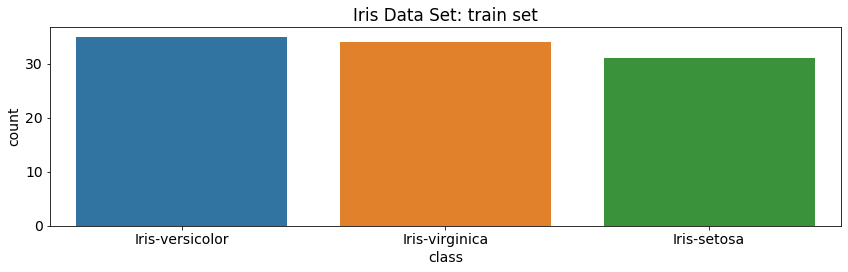

In [10]:
sns.countplot(x=y_train, data=df)
plt.title('Iris Data Set: train set')
plt.tight_layout()

**(4)** Test Harness

We will use stratified 10-fold cross validation to estimate model accuracy.

We will also estimate a model's `accuracy`: `number of correctly predicted instances / the total number of instances`.

**(5)** Build Models

We get an idea from the plots that some of the classes are partially linearly separable in some dimensions, so we are expecting generally good results.

We will be testing 6 different algorithms:

- Logistic Regression (LR)
- Linear Discriminant Analysis (LDA)
- k-Nearest Neighbors (KNN).
- Classification and Regression Trees (CART).
- Gaussian Naive Bayes (NB).
- Support Vector Machines (SVM).

This is a good mixture of simple linear (LR and LDA) and nonlinear (KNN, CART, NB and SVM) algorithms.

In [11]:
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))

In [12]:
results = []
names = []
CV=10
print('model\t mean (std)')
print('-------------------')
for name, model in models:
    kfold = StratifiedKFold(n_splits=CV, random_state=1, shuffle=True)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print('%s:\t %.2f (%f)' % (name, cv_results.mean(), cv_results.std()))

model	 mean (std)
-------------------
LR:	 0.94 (0.048990)
LDA:	 0.98 (0.040000)
KNN:	 0.93 (0.078102)
CART:	 0.92 (0.074833)
NB:	 0.93 (0.064031)
SVM:	 0.95 (0.050000)


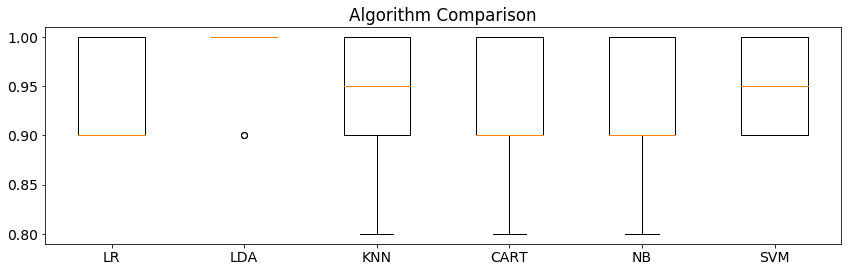

In [13]:
plt.boxplot(results, labels=names)
plt.title('Algorithm Comparison')
plt.tight_layout()

**(6)** Make predictions

In [14]:
model = LinearDiscriminantAnalysis()
model.fit(X_train, y_train)
predictions = model.predict(X_test)

In [15]:
# Evaluate predictions
print(accuracy_score(y_test, predictions))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

0.98
[[19  0  0]
 [ 0 15  0]
 [ 0  1 15]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        19
Iris-versicolor       0.94      1.00      0.97        15
 Iris-virginica       1.00      0.94      0.97        16

       accuracy                           0.98        50
      macro avg       0.98      0.98      0.98        50
   weighted avg       0.98      0.98      0.98        50



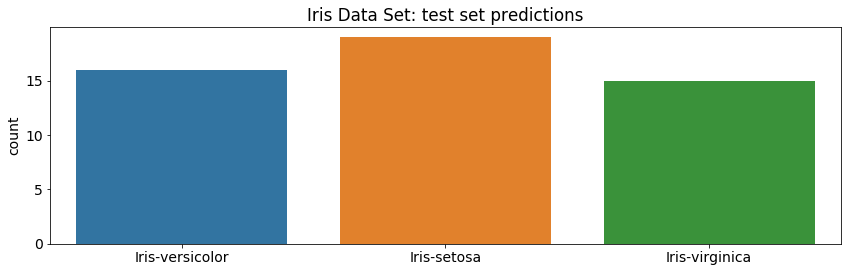

In [16]:
sns.countplot(x=predictions, data=df)
plt.title('Iris Data Set: test set predictions')
plt.tight_layout()

Now let's say I want to predict the class of a single flower with round petals and no sepals:

In [17]:
single_sample = np.array(
    [0,  # sepal_length
     0,  # sepal_width
     2,  # petal_length
     2]  # petal_width
).reshape(1,-1)  # reshape is for a single feature/sample
single_sample_prediction = model.predict(single_sample)[0]
single_sample_keys = df.columns.tolist()[:4]

In [18]:
single_sample_dict = {}
for k, v in zip(single_sample_keys, list(single_sample[0])):
    single_sample_dict[k] = v
single_sample_dict['my_pred'] = single_sample_prediction

In [19]:
cp.print_prediction(single_sample_dict)

My prediction for a flower with features
    - sepal_length = 0
    - sepal_width  = 0
    - petal_length = 2
    - petal_width = 2

	is Iris-virginica.
